Probando monte carlo tree search

### Seleccion
- Elegir un nodo, desde donde se va realizar la simulación.

In [ ]:
class Nodo:
    def __init__(self, estado, padre=None):
        self.estado = estado  # Estado del juego en este nodo
        self.padre = padre    # Nodo padre
        self.hijos = []       # Nodos hijos
        self.visitas = 0      # Número de visitas a este nodo
        self.valor = 0        # Valor acumulado (resultados de las simulaciones)


- Selección con UCB1: para elegir el nodo donde se inicia. (Upper Confidence Bound)

In [ ]:
import math

def ucb1(nodo):
    if nodo.visitas == 0:
        return float('inf')  # Explorar nodos no visitados
    else:
        return nodo.valor / nodo.visitas + math.sqrt(2 * math.log(nodo.padre.visitas) / nodo.visitas)

def seleccionar_mejor_nodo(nodo):
    # Selecciona el hijo con el mayor valor UCB1
    return max(nodo.hijos, key=ucb1)

$UCB1 = \frac{nodo.valor}{nodo.visitas} + 1\cdot \sqrt{2 \cdot \frac{\ln(nodo.padre.visitas)}{nodo.visitas}}$


In [5]:
import numpy as np
nodo_valor = 1
nodo_visitas = 1
nodo_padre_visitas = 2
ucb1_values = nodo_valor / nodo_visitas + np.sqrt(2 * np.log(nodo_padre_visitas) / nodo_visitas)
ucb1_values

2.177410022515475

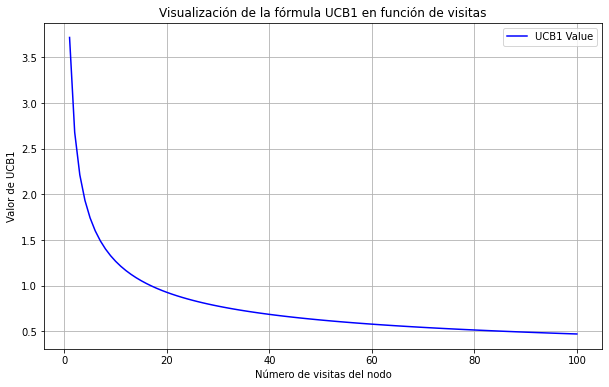

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir valores de ejemplo
nodo_valor = np.linspace(0, 10, 100)  # Valores de nodo entre 0 y 10
nodo_visitas = np.linspace(1, 100, 100)  # Cantidad de visitas de 1 a 100
padre_visitas = 1000  # Un ejemplo de visitas del nodo padre

# Calcular UCB1
ucb1_values = nodo_valor / nodo_visitas + np.sqrt(2 * np.log(padre_visitas) / nodo_visitas)

# Graficar la fórmula
plt.figure(figsize=(10, 6))
plt.plot(nodo_visitas, ucb1_values, label="UCB1 Value", color='b')
plt.title("Visualización de la fórmula UCB1 en función de visitas")
plt.xlabel("Número de visitas del nodo")
plt.ylabel("Valor de UCB1")
plt.grid(True)
plt.legend()
plt.show()
